In [1]:
import pandas as pd
from glob import glob
print(glob("*.csv"))

['high_school_graduates.csv', 'population.csv']


In [2]:
df_population = pd.read_table('population.csv',
                              encoding = 'utf8',
                              header = 3,
                              skiprows = [35,36],
                              sep =','
                             )
df_graduates = pd.read_table('high_school_graduates.csv',
                              encoding = 'utf8',
                              header = 3,
                              skiprows = [35,36],
                              sep =','
                            )

In [17]:
df_population.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df_population.columns]
years = [ x for x in df_population.columns if x!='地区']
df_population_melted = pd.melt(df_population, id_vars=['地区'], value_vars=years)
df_population_melted.columns = ['地区', '年', '年末总人口']
df_population_done = df_population_melted

In [19]:
df_graduates.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df_graduates.columns]
df_graduates_melted = pd.melt(df_graduates, id_vars=['地区'], value_vars=years)
df_graduates_melted.columns = ['地区', '年', '高中毕业人数']
df_graduates_done = df_graduates_melted

In [34]:
df_pg = df_population_done.join(df_graduates_done,lsuffix='', rsuffix='_毕业').drop(["地区_毕业","年_毕业"], axis=1).set_index(["地区","年"])

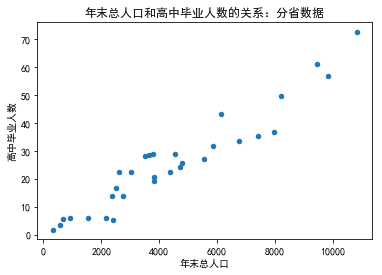

In [48]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

df_plot = df_pg.query("年==2015").plot(kind='scatter', x='年末总人口', y='高中毕业人数', 
          title = '年末总人口和高中毕业人数的关系：分省数据')